In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidneystone/kidney-stone-dataset.csv


In [2]:
# Import necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# 1. Import the kidney Stone dataset and Understanding of data

In [3]:
df = pd.read_csv("/kaggle/input/kidneystone/kidney-stone-dataset.csv")

In [4]:
df.shape

(90, 8)

In [5]:
df.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


## No any object datatype present in the dataset hence, no need to further preprocess columns to convert into numerical datatype

In [7]:
df.describe()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,44.500000,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.500000
std,26.124701,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.502801
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,22.250000,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,44.500000,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,0.500000
75%,66.750000,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,89.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


# 2. Handle missing values preprocess the data

In [8]:
df.isnull().sum()

Unnamed: 0    0
gravity       0
ph            0
osmo          0
cond          0
urea          0
calc          0
target        0
dtype: int64

In [9]:
# Drop irelevent coloum to prepare the data for model development 
df.drop(columns = ["Unnamed: 0"], inplace=True)

In [10]:
df['target'].value_counts() 

0    45
1    45
Name: target, dtype: int64

In [11]:
# We can see that from target value counts Label data is balanced type of data as values fall 50% (0 & 1)

# 3. EDA - (Exploratory Data Analysis) 

## 1. Univariate data analysis

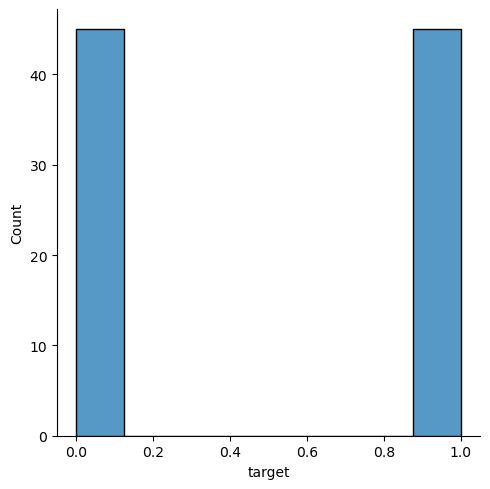

In [12]:
sns.displot(df['target'])
plt.show()

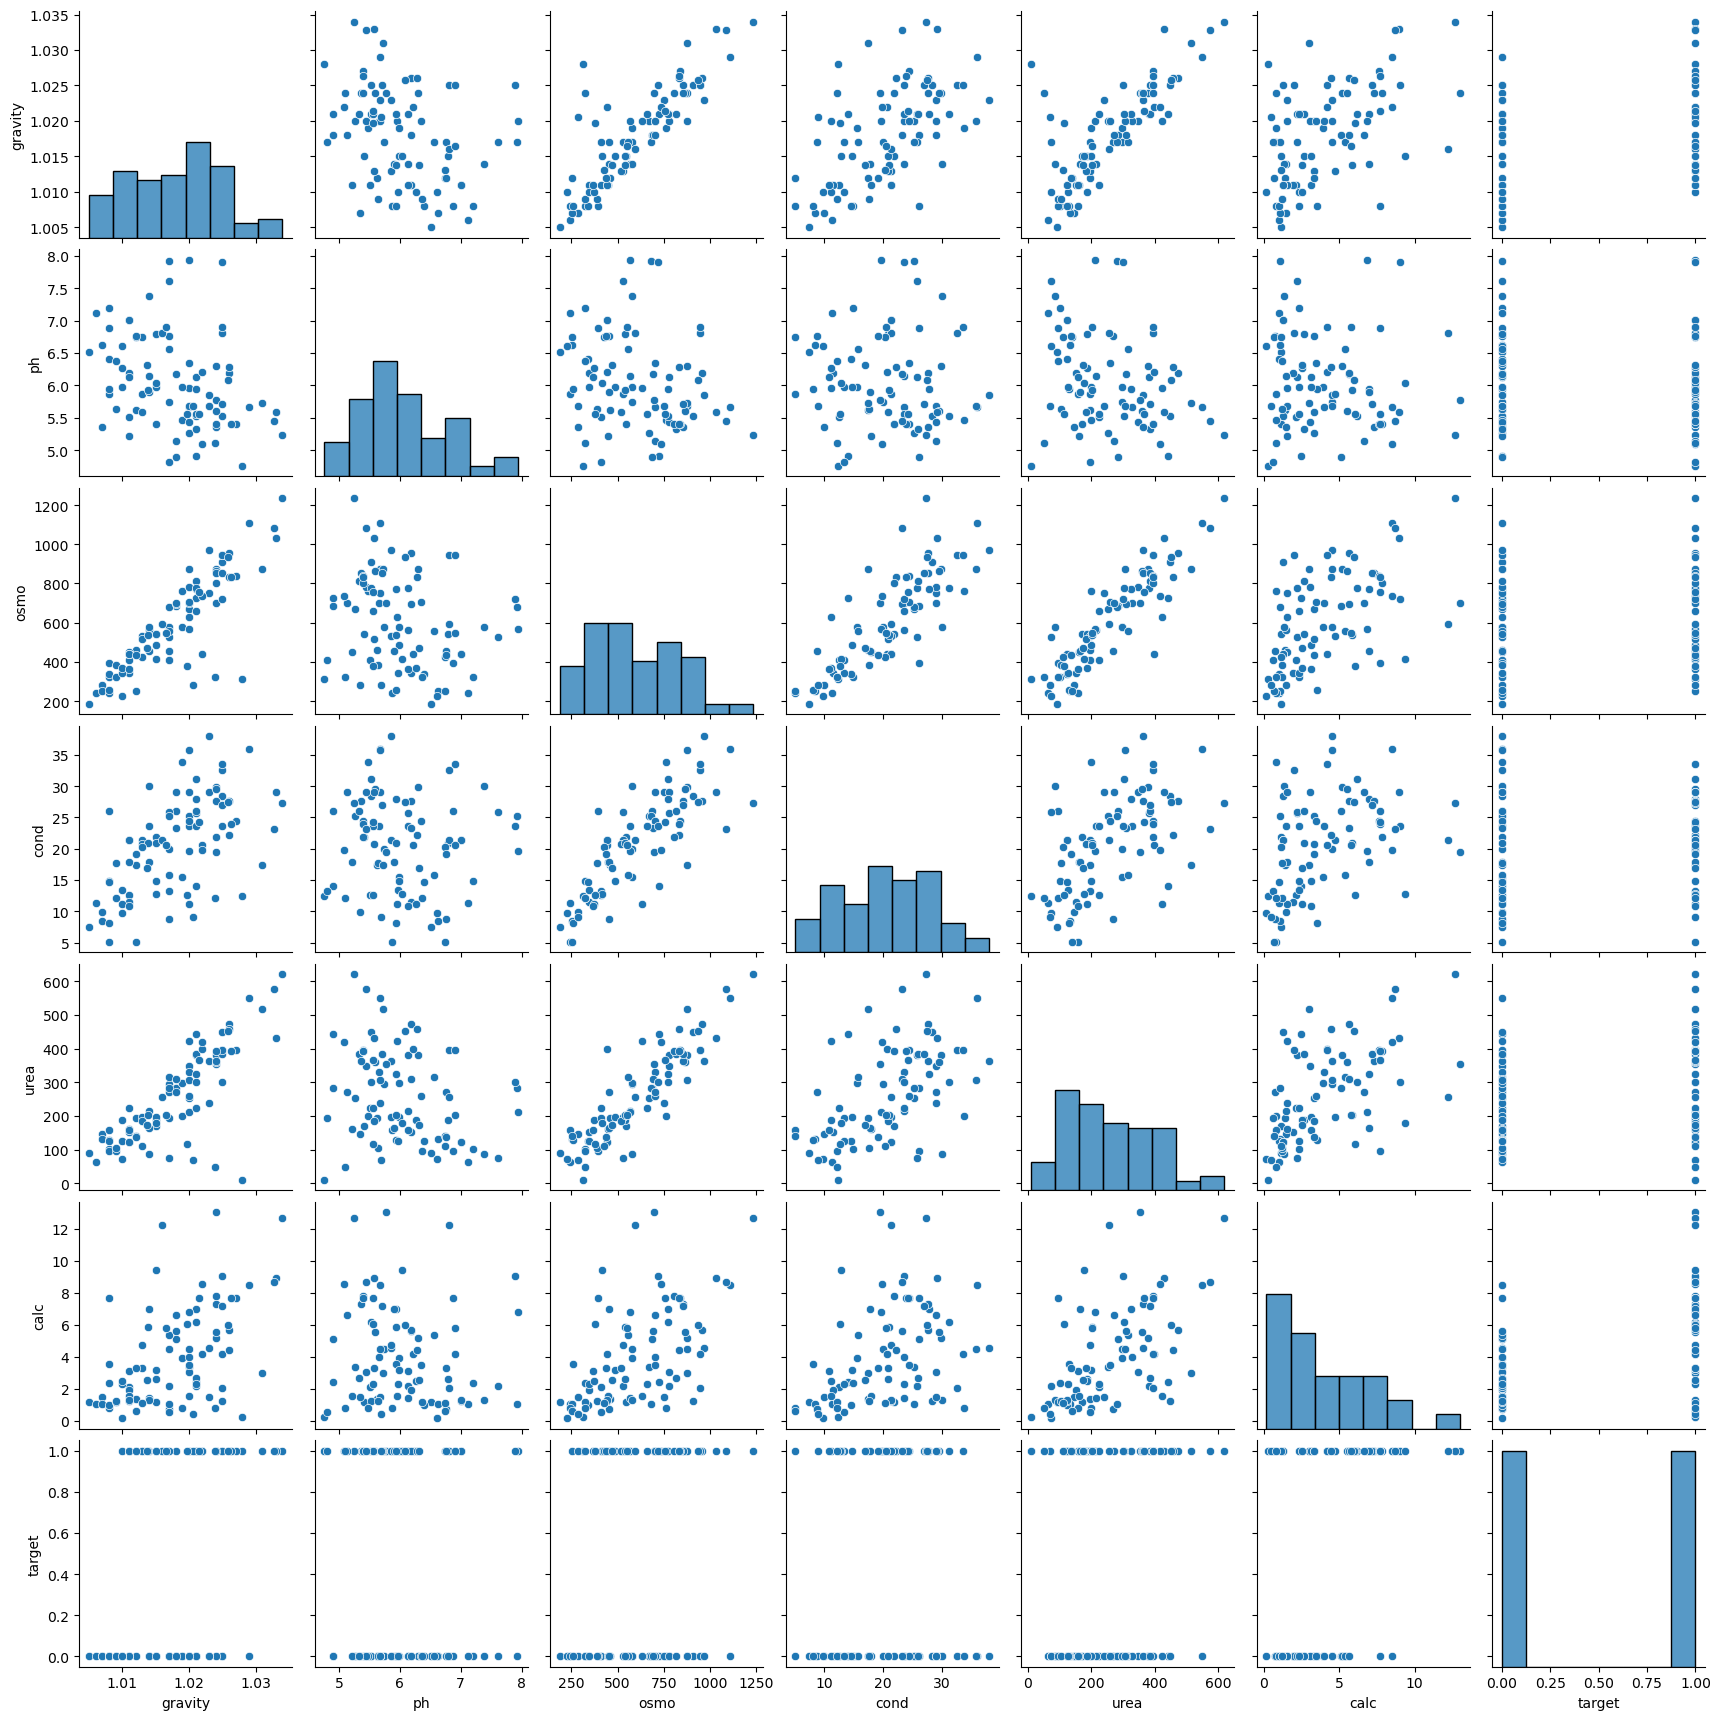

In [13]:
sns.pairplot(df)

<AxesSubplot:>

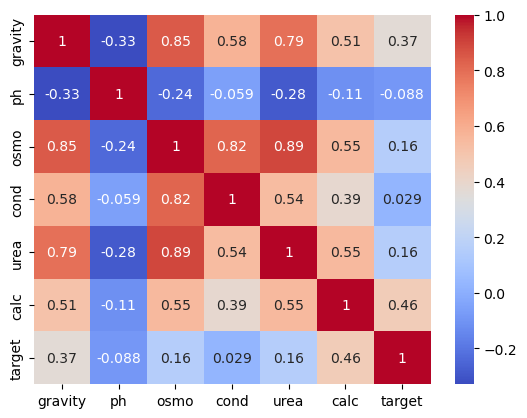

In [14]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

## As per heatmap we are suppoed to drop 85% corelated column fro the dataframe but due to small dataset this will not work because Logistic Regression performance affected due to Multicolinerity 

In [15]:
X = df.iloc[:,0:6].values
y = df['target'].values

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 6)
(18, 6)
(72,)
(18,)


In [17]:
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

# 4. Model Building ( Logistic Regression, SVM, RandomForest)

In [18]:
# Let's implement Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train_scaled,y_train)
y_pred1 = model1.predict(X_test_scaled)

In [19]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.78      0.88      0.82         8

    accuracy                           0.83        18
   macro avg       0.83      0.84      0.83        18
weighted avg       0.84      0.83      0.83        18



In [20]:
print(confusion_matrix(y_test,y_pred1))

[[8 2]
 [1 7]]


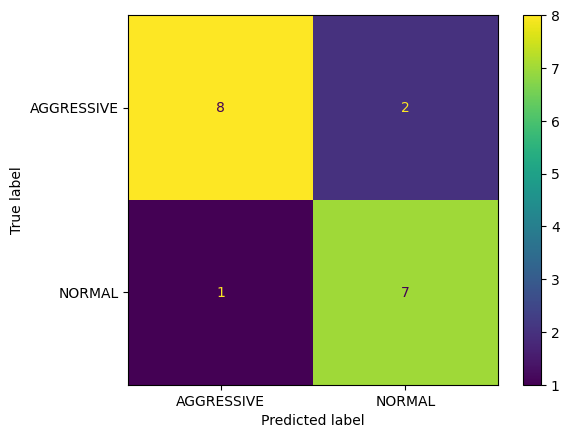

In [21]:
classes = ['AGGRESSIVE','NORMAL']
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred1,display_labels=classes)
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

In [22]:
# Try out with SVM Model
from sklearn.svm import SVC
model2 = SVC(kernel = 'linear')
model2.fit(X_train_scaled,y_train)
y_pred2 = model2.predict(X_test_scaled)

In [23]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.78      0.88      0.82         8

    accuracy                           0.83        18
   macro avg       0.83      0.84      0.83        18
weighted avg       0.84      0.83      0.83        18



In [24]:
print(confusion_matrix(y_test,y_pred2))

[[8 2]
 [1 7]]


In [25]:
# Let's check model performance with Ensemble techniques
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train_scaled,y_train)
y_pred3 = model3.predict(X_test_scaled)

In [26]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.75      0.75      0.75         8

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18



In [27]:
print(confusion_matrix(y_test,y_pred3))

[[8 2]
 [2 6]]


# 5. Inference

In [28]:
# Inference:-
#   1) All model getting 83% model accuracy
#   2) model predict 89% True positive rate out of total positive data points
#   3) Model predict 80% True negative rate out of total negetive data points
#   4) In case of improve accuracy of the model we need to feed more data to recognize the input pattern by the model and then predict 
#      based of input pattern
#   5) Hence, Logistic Regression and SVM is performed good with 83% accuracy

In [29]:
# Thank You!
#   If you like the work please Upvote. If any improvement needed kindly suggest on comments!! 